<a href="https://colab.research.google.com/github/sujalkumeriya59/Machine-Learning/blob/main/Pract3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
Accuracy: 0.9465
Precision (weighted): 0.9465
Recall (weighted): 0.9465
F1-Score (weighted): 0.9464
ROC-AUC (weighted): 0.9975
Confusion Matrix:
[[201   0   1   0   0   1   1   0   1   0]
 [  0 2

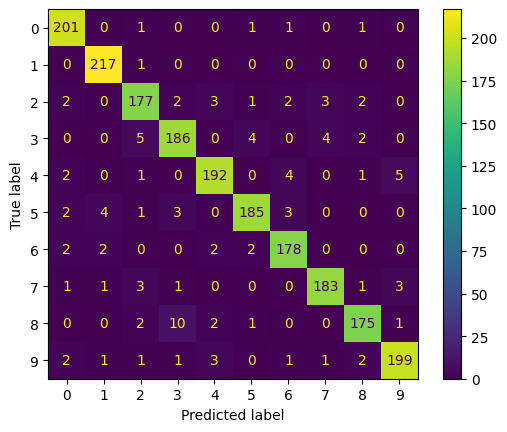

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Step 1: Load the MNIST dataset
# Replace 'mnist_test.csv' with your actual CSV file path
df = pd.read_csv('/content/sample_data/mnist_test.csv')  # Load the MNIST dataset

# Display the first few rows to understand the structure
print(df.head())  # Check the structure of the dataset

# Check if 'label' column exists, if not, try another name like '7'
if 'label' not in df.columns:
    # Assuming the first column contains the labels, adjust accordingly if needed
    df = df.rename(columns={df.columns[0]: 'label'})

# Step 2: Separate Features and Target
X = df.drop('label', axis=1)  # Features: Drop the 'label' column
y = df['label']  # Target: The 'label' column contains the digit labels (0-9)


# Step 3: Train-Test Split
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling (Optional for Random Forest, but recommended for consistency)
# Random Forest is not sensitive to scaling, but scaling is generally a good practice.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler

# Step 5: Initialize and Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize the Random Forest model
model.fit(X_train_scaled, y_train)  # Train the model with the scaled training data

# Step 6: Make Predictions on Test Data
y_pred = model.predict(X_test_scaled)  # Predict on the scaled test data

# Step 7: Evaluate the Model Using Various Metrics

# Accuracy: The proportion of correct predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision (weighted for multi-class classification): Precision for each class, weighted by the number of true instances
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision (weighted): {precision:.4f}')

# Recall (weighted for multi-class classification): Recall for each class, weighted by the number of true instances
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall (weighted): {recall:.4f}')

# F1-Score (weighted for multi-class classification): Harmonic mean of precision and recall, weighted
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score (weighted): {f1:.4f}')

# ROC-AUC (weighted for multi-class classification): Area Under the ROC Curve (One-vs-Rest approach)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class='ovr', average='weighted')
print(f'ROC-AUC (weighted): {roc_auc:.4f}')

# Step 8: Confusion Matrix
# Confusion matrix shows the counts of true positive, false positive, true negative, and false negative predictions
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Visualize Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_).plot()

# Step 9: Cross-Validation (Optional for better performance estimation)
# Cross-validation evaluates model performance on multiple subsets of the dataset.
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}')



# New Section